In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('miles-driven.csv',sep = "|")
df1 = pd.read_csv('road-accidents.csv',sep = "|",comment = "#")

In [4]:
df.head()

,state,million_miles_annually
0,Alabama,64914
1,Alaska,4593
2,Arizona,59575
3,Arkansas,32953
4,California,320784


In [5]:
df1.head()

,state,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time
0,Alabama,18.8,39,30,80
1,Alaska,18.1,41,25,94
2,Arizona,18.6,35,28,96
3,Arkansas,22.4,18,26,95
4,California,12.0,35,28,89


In [6]:
numerical_stats = df1.describe()

In [7]:
numerical_stats

,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time
count,51.000000,51.000000,51.000000,51.00000
mean,15.790196,31.725490,30.686275,88.72549
std,4.122002,9.633438,5.132213,6.96011
min,5.900000,13.000000,16.000000,76.00000
25%,12.750000,23.000000,28.000000,83.50000
50%,15.600000,34.000000,30.000000,88.00000
75%,18.500000,38.000000,33.000000,95.00000
max,23.900000,54.000000,44.000000,100.00000


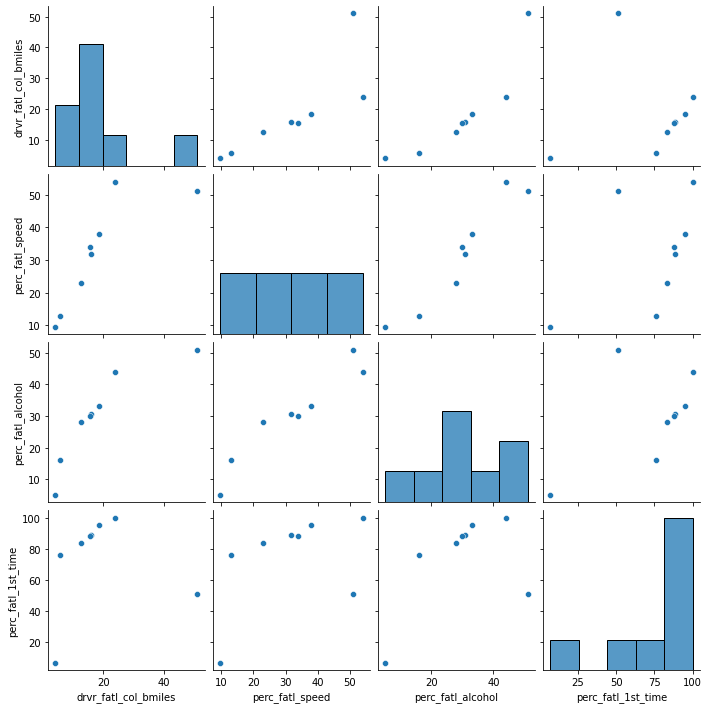

In [8]:
import seaborn as sns 
import matplotlib.pyplot as plt
sns.pairplot(numerical_stats)
plt.show()

In [9]:
quantify = df1.corr()
quantify

,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time
drvr_fatl_col_bmiles,1.000000,-0.029080,0.199426,-0.017942
perc_fatl_speed,-0.029080,1.000000,0.286244,0.014066
perc_fatl_alcohol,0.199426,0.286244,1.000000,-0.245455
perc_fatl_1st_time,-0.017942,0.014066,-0.245455,1.000000


In [10]:
quantify.max()

drvr_fatl_col_bmiles    1.0
perc_fatl_speed         1.0
perc_fatl_alcohol       1.0
perc_fatl_1st_time      1.0
dtype: float64

In [11]:
quantify.min()

drvr_fatl_col_bmiles   -0.029080
perc_fatl_speed        -0.029080
perc_fatl_alcohol      -0.245455
perc_fatl_1st_time     -0.245455
dtype: float64

<AxesSubplot:>

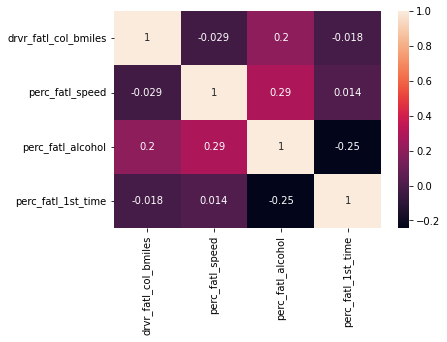

In [12]:
sns.heatmap(quantify,annot=True)

In [13]:
from sklearn import linear_model
x = df1[['perc_fatl_speed', 'perc_fatl_alcohol', 'perc_fatl_1st_time']]
y = df1['drvr_fatl_col_bmiles']

In [14]:
lr = linear_model.LinearRegression()

In [15]:
lr.fit(x,y)

LinearRegression()

In [16]:
lr.coef_

array([-0.04180041,  0.19086404,  0.02473301])

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [18]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(x_scaled)

PCA()

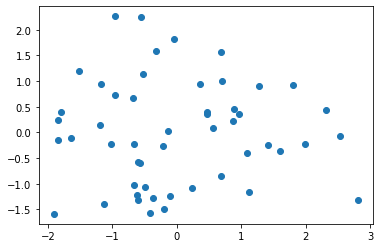

In [19]:
pca = PCA(n_components=2)
p_comps = pca.fit_transform(x_scaled)
p_comp1 = p_comps[:, 0]
p_comp2 = p_comps[:, 1]
plt.scatter(p_comp1, p_comp2)

In [20]:
from sklearn.cluster import KMeans

C:\Users\USER\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\USER\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\USER\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\USER\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows wi

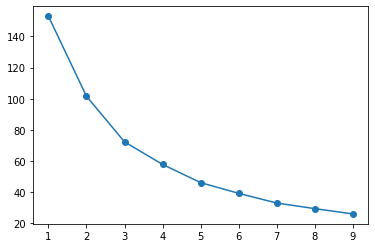

In [23]:
from sklearn.cluster import KMeans

ks = range(1, 10)
inertias = []
for k in ks:
    km = KMeans(n_clusters=k, random_state=8)
    km.fit(x_scaled)
    inertias.append(km.inertia_)


plt.plot(ks, inertias, marker="o")

C:\Users\USER\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


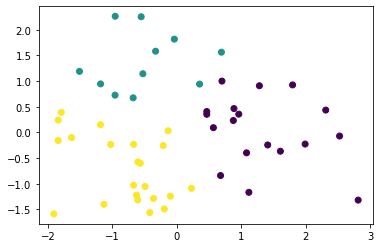

In [24]:
km = KMeans(n_clusters=3, random_state=8)
km.fit(x_scaled)
plt.scatter(p_comps[:, 0], p_comps[:, 1], c=km.labels_)

<AxesSubplot:xlabel='percent', ylabel='measurement'>

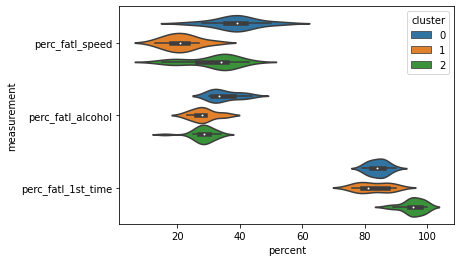

In [25]:
df1['cluster'] = km.labels_

melt_car = pd.melt(df1, id_vars='cluster', var_name='measurement', value_name='percent',
                   value_vars=['perc_fatl_speed', 'perc_fatl_alcohol', 'perc_fatl_1st_time'])

# Create a violin plot splitting and coloring the results according to the km-clusters
sns.violinplot(y='measurement', x='percent', data=melt_car, hue='cluster')

In [28]:
car_acc_miles = df1.merge(df, on='state')
car_acc_miles['num_drvr_fatl_col'] = (car_acc_miles['drvr_fatl_col_bmiles'] * car_acc_miles['million_miles_annually']) / 1000

display(car_acc_miles.head())

,state,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time,cluster,million_miles_annually,num_drvr_fatl_col
0,Alabama,18.8,39,30,80,0,64914,1220.3832
1,Alaska,18.1,41,25,94,2,4593,83.1333
2,Arizona,18.6,35,28,96,2,59575,1108.0950
3,Arkansas,22.4,18,26,95,2,32953,738.1472
4,California,12.0,35,28,89,2,320784,3849.4080


,count,mean,sum
cluster,,,
0,18,911.406439,16405.3159
1,11,860.505945,9465.5654
2,22,898.378595,19764.3291


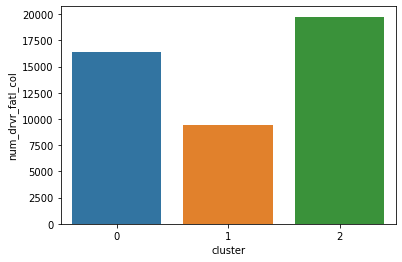

In [29]:
sns.barplot(x='cluster', y='num_drvr_fatl_col', data=car_acc_miles, estimator=sum, ci=None)

count_mean_sum = car_acc_miles.groupby('cluster')['num_drvr_fatl_col'].agg(['count', 'mean', 'sum'])
count_mean_sum